In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
%matplotlib inline

[0.5 2. ]
Eigen values of Hessian matrix:  [2.05189714 0.06870891]
First eigen vector of Hessian matrix:  [0.99998927 0.00463202]
Second eigen vector of Hessian matrix:  [-0.00463202  0.99998927]


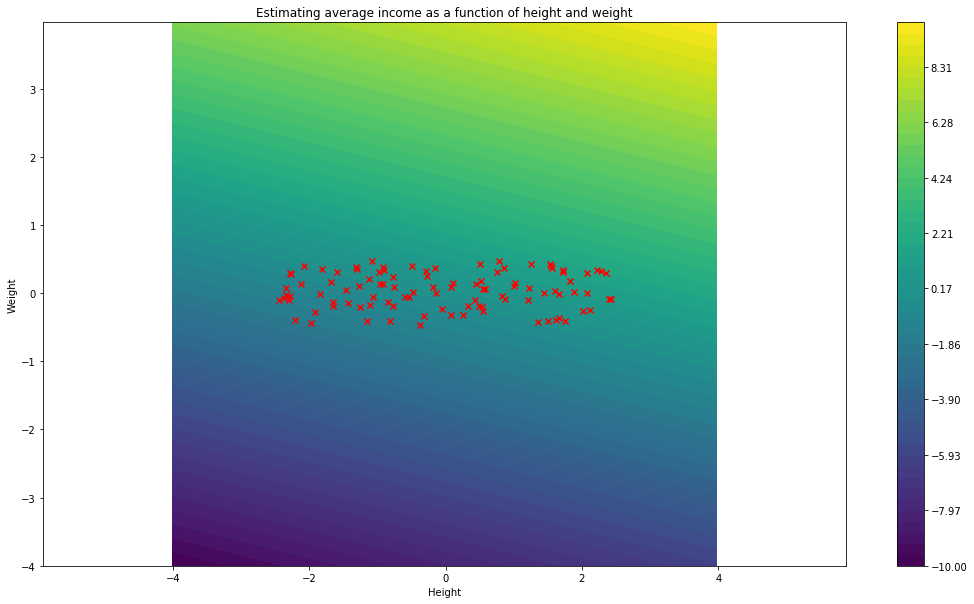

In [11]:
# Convert least squares problem to quadratic. 
# Give a plot illustrating the least squares problem.

delta=0.025
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = 0.5*X+2*Y   # Income is truly 0.5* height + 2*weight (but we don't know yet)
true_w = np.array([0.5,2])
levels = np.linspace(Z.min(), Z.max(), 50)
plt.figure(figsize=(18,10))
plt.axis('equal')
CS = plt.contourf(X, Y, Z, levels=levels, cmap="viridis")
plt.colorbar()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Estimating average income as a function of height and weight')

num_samples=100
x=np.random.rand(num_samples,2)-0.5   
data_transform=np.array([[5,0],[0,1]])  

x=np.dot(data_transform, x.T).T # The heights and weights of num_samples people
y = np.dot(x,true_w) + 0.0*np.random.randn(num_samples) # The incomes of num_samples people 

plt.scatter(x[:,0],x[:,1],color='r', marker='x')

A = np.dot(x.T,x)/num_samples
b = np.dot(y,x)/num_samples
c = np.dot(y,y)/(2*num_samples)

# print(A)
# print(b)
# print(c)

# objective is 0.5* \frac{1}{n} \sum_{i=1}^n (w^\top x_i - y_i)^2
# which is equal to 0.5 * w^\top A w - b^\top w + c
# Minimiser of above is given by solving Aw=b


A_inv = np.linalg.inv(A)
w_soln = np.dot(A_inv, b)
print(w_soln)

d,v = np.linalg.eig(A)
# print(v)
print("Eigen values of Hessian matrix: ", d)
print("First eigen vector of Hessian matrix: ", v[:,0])
print("Second eigen vector of Hessian matrix: ", v[:,1])

smooth_coeff=d.max()


[2.05940972 3.8762762 ]
[0.4943606  3.80605583]
[0.48994848 3.68109476]
[0.49698536 2.00356267]
[0.49987031 2.00000109]
[0.49999999 1.99999968]
Quasi newton done
[0.52970486 3.9381381 ]
[0.37219697 3.67109271]
[0.5573588  3.58580567]
[0.42509954 3.47625232]
[0.56522342 3.37544586]
[0.4187595 3.2802828]
[0.53495919 3.21482653]
[0.45206853 3.13098429]
[0.54002763 3.05366778]
[0.44821768 2.98085888]
[0.54545723 2.91389908]
[0.46920715 2.86646198]
[0.55204174 2.77753049]
[0.46659833 2.73707968]
[0.52836282 2.6867112 ]
[0.46385825 2.63923826]
[0.53214377 2.5956217 ]
[0.47857444 2.56468785]
[0.5173493  2.52606155]
[0.47691861 2.48973468]


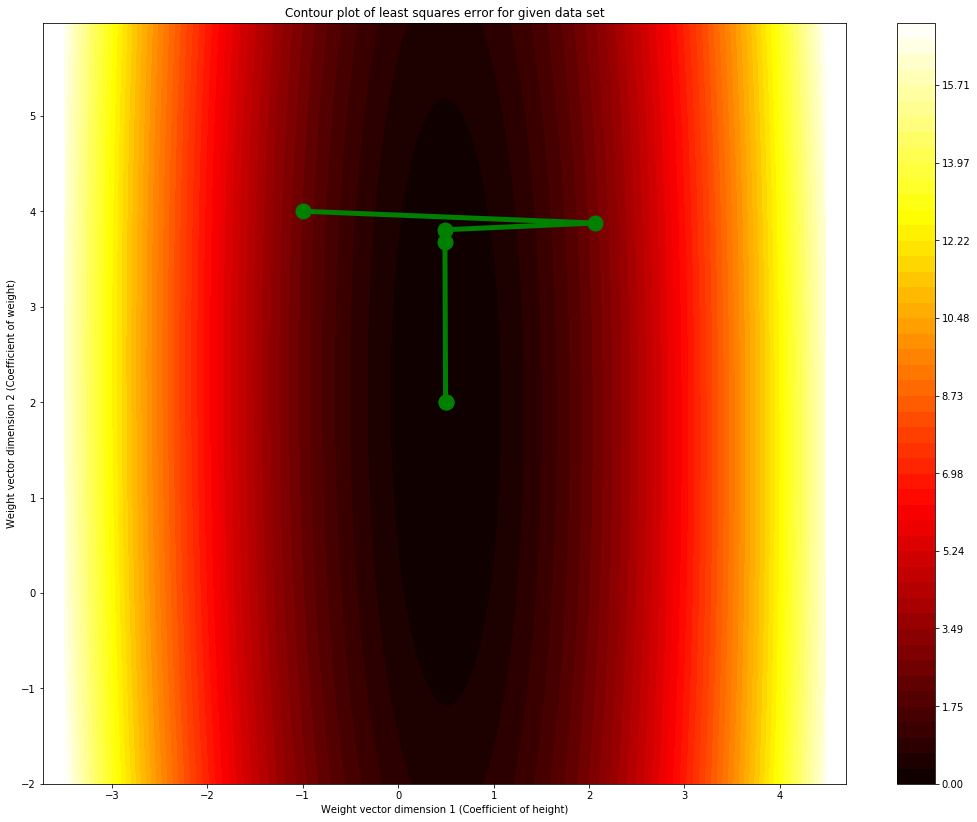

In [18]:
# Contour plots and gradient descent for minimising a quadratic:
# f(w) = 0.5*w^\top A w + b^\top w + c

delta=0.025

x = np.arange(true_w[0]-4., true_w[0]+4.0, delta)
y = np.arange(true_w[1]-4., true_w[1]+4.0, delta)

X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[0]):
        input_vec = np.array([X[i,j],Y[i,j]])
#         input_vec = input_vec[:,None]
        temp = np.dot(A, input_vec)
        Z[i,j] = 0.5*np.dot(input_vec, np.dot(A, input_vec)) 
        Z[i,j] -= np.dot(b, input_vec) 
        Z[i,j] += c
        

levels = np.linspace(Z.min(), Z.max(), 50)

plt.figure(figsize=(18,14))
plt.axis('equal')
CS = plt.contourf(X, Y, Z, levels=levels, cmap="hot")
plt.xlabel("Weight vector dimension 1 (Coefficient of height)")
plt.ylabel("Weight vector dimension 2 (Coefficient of weight)")
plt.title("Contour plot of least squares error for given data set")
plt.colorbar()
plt.plot(true_w[0], true_w[1],'bo')

num_iter=20

w=np.array([-1., 4.])

trajectory=np.zeros((2,num_iter))

# Quasi Newton (BFGS)
H =  np.eye(2)
for i in range(num_iter):
    trajectory[:,i]=w
    grad = np.dot(A,w)-b
    if np.linalg.norm(grad)< 1e-5:
        break
    direction = np.dot(H, grad)
    value = 0.5*np.dot(w, np.dot(A, w)) - np.dot(b, w) + c
#     eta=1.
#     max_eta=np.inf
#     min_eta=0.
#     while True:
#         w_cand = w - (eta)*direction
#         f = 0.5*np.dot(w_cand, np.dot(A, w_cand)) - np.dot(b, w_cand) + c
#         f1 = value - eta*0.5*np.sum(grad*grad)
#         f2 = value - eta*0.25*np.sum(grad*grad)
# #         print(eta,f,f1,f2)
#         if f<f2 and f>f1:
#             break
#         if f>f2:
#             max_eta = eta
#             eta = (eta+min_eta)/2
#         if f<f1:
#             min_eta = eta
#             eta = min(2.*eta, (eta+max_eta)/2.)
    w_cand = w - direction
    s = w_cand - w
    y = np.dot(A,w_cand)-b - grad
    
    rho =  1/np.dot(s,y)
    mat1 = np.eye(2) - rho*np.dot(s[:,None],y[None,:])
    mat2 = rho*np.dot(s[:,None],s[None,:])
    H = np.dot(mat1,np.dot(H,mat1.T)) + mat2
    w = w_cand
#     print(eta)
    print(w)

plt.plot(trajectory[0,:i],trajectory[1,:i],'go-', markersize=15, linewidth=5)


print("Quasi newton done")
# # Gradient descent

trajectory=np.zeros((2,num_iter))
w=np.array([-1., 4.])
for i in range(num_iter):
    trajectory[:,i]=w
    grad = np.dot(A,w)-b
    value = 0.5*np.dot(w, np.dot(A, w)) - np.dot(b, w) + c
    eta=1
    max_eta=np.inf
    min_eta=0.
    while True:
        w_cand = w - (eta)*grad
        f = 0.5*np.dot(w_cand, np.dot(A, w_cand)) - np.dot(b, w_cand) + c
        f1 = value - eta*0.5*np.sum(grad*grad)
        f2 = value - eta*0.25*np.sum(grad*grad)
#         print(eta,f,f1,f2)
        if f<f2 and f>f1:
            break
        if f>f2:
            max_eta = eta
            eta = (eta+min_eta)/2
        if f<f1:
            min_eta = eta
            eta = min(2.*eta, (eta+max_eta)/2.)
            
    w = w_cand
#     print(eta)
    print(w)
    

# plt.plot(trajectory[0,:],trajectory[1,:],'rx-', markersize=15, linewidth=5)